In [1]:
#fas-정재환
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
import csv
import json
import seaborn as sns
%matplotlib inline 

In [2]:
#저장된 csv파일을 0번째줄을 인덱스 시작으로 읽어온다
data_health = pd.read_csv("health.csv", index_col=0)
#특정 컬럼(WEIGHT) 값이 5로 나누어 떨어지지 않는 데이터는 모두 삭제한다
remove_index = data_health[data_health['WEIGHT'] % 5 != 0].index
data_health = data_health.drop(remove_index)
data_health.reset_index(drop=True, inplace=True)
data_health

,HEIGHT,WEIGHT,WAIST,MAX_PRESSURE,HEMOGLOBIN,SMOKE
0,160,60,80.0,128,16.6,3
1,180,70,83.0,119,14.2,3
2,160,55,73.0,129,14.2,1
3,155,50,73.0,101,16.5,1
4,160,50,71.0,104,14.8,1
...,...,...,...,...,...,...
1153,140,45,79.0,118,12.5,1
1154,175,75,85.0,100,14.8,3
1155,170,75,86.0,141,15.5,2
1156,169,70,89.9,113,15.0,1


In [3]:
# 데이터프레임을 json파일로 저장
data_health.to_json('health.json')

In [4]:
# json파일을 읽어와서 데이터프레임 형식으로 변환
df = pd.read_json (r'health.json')
df

,HEIGHT,WEIGHT,WAIST,MAX_PRESSURE,HEMOGLOBIN,SMOKE
0,160,60,80.0,128,16.6,3
1,180,70,83.0,119,14.2,3
2,160,55,73.0,129,14.2,1
3,155,50,73.0,101,16.5,1
4,160,50,71.0,104,14.8,1
...,...,...,...,...,...,...
1153,140,45,79.0,118,12.5,1
1154,175,75,85.0,100,14.8,3
1155,170,75,86.0,141,15.5,2
1156,169,70,89.9,113,15.0,1


In [5]:
#컬럼명 변경
df = df.rename({'HEIGHT':'신장', 'WEIGHT':'체중', 'WAIST':'허리둘레', 'MAX_PRESSURE':'혈압', 'HEMOGLOBIN':'적혈구', 'SMOKE':'흡연'}, axis='columns')
df

,신장,체중,허리둘레,혈압,적혈구,흡연
0,160,60,80.0,128,16.6,3
1,180,70,83.0,119,14.2,3
2,160,55,73.0,129,14.2,1
3,155,50,73.0,101,16.5,1
4,160,50,71.0,104,14.8,1
...,...,...,...,...,...,...
1153,140,45,79.0,118,12.5,1
1154,175,75,85.0,100,14.8,3
1155,170,75,86.0,141,15.5,2
1156,169,70,89.9,113,15.0,1


In [6]:
#한글 폰트 적용 - 한글깨짐 방지
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

Text(0.5, 1.0, '체중별 적혈구 농도')

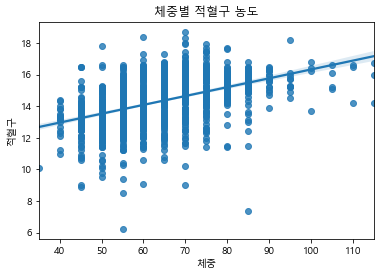

In [7]:
# regplot-산점도와 선형성
ax = sns.regplot(x="체중", y="적혈구", data=df)
ax.set_xlabel("체중")
ax.set_ylabel("적혈구")
ax.set_title("체중별 적혈구 농도")

Text(0.5, 1.0, '체중별 적혈구 농도(흡연여부별로 그룹화)')

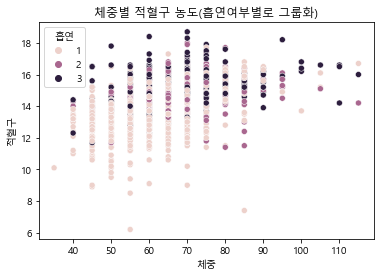

In [8]:
# scatterplot-산점도
#결과를 흡연여부별로 그룹화
ax = sns.scatterplot(x="체중", y="적혈구", hue="흡연", data=df)
ax.set_xlabel("체중")
ax.set_ylabel("적혈구")
ax.set_title("체중별 적혈구 농도(흡연여부별로 그룹화)")

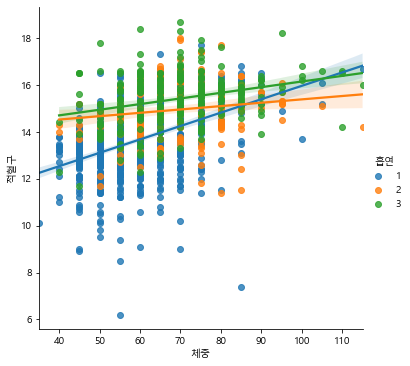

In [9]:
#lmplot-산점도, 그룹별로 선현성
ax = sns.lmplot(x="체중", y="적혈구", hue="흡연", data=df)

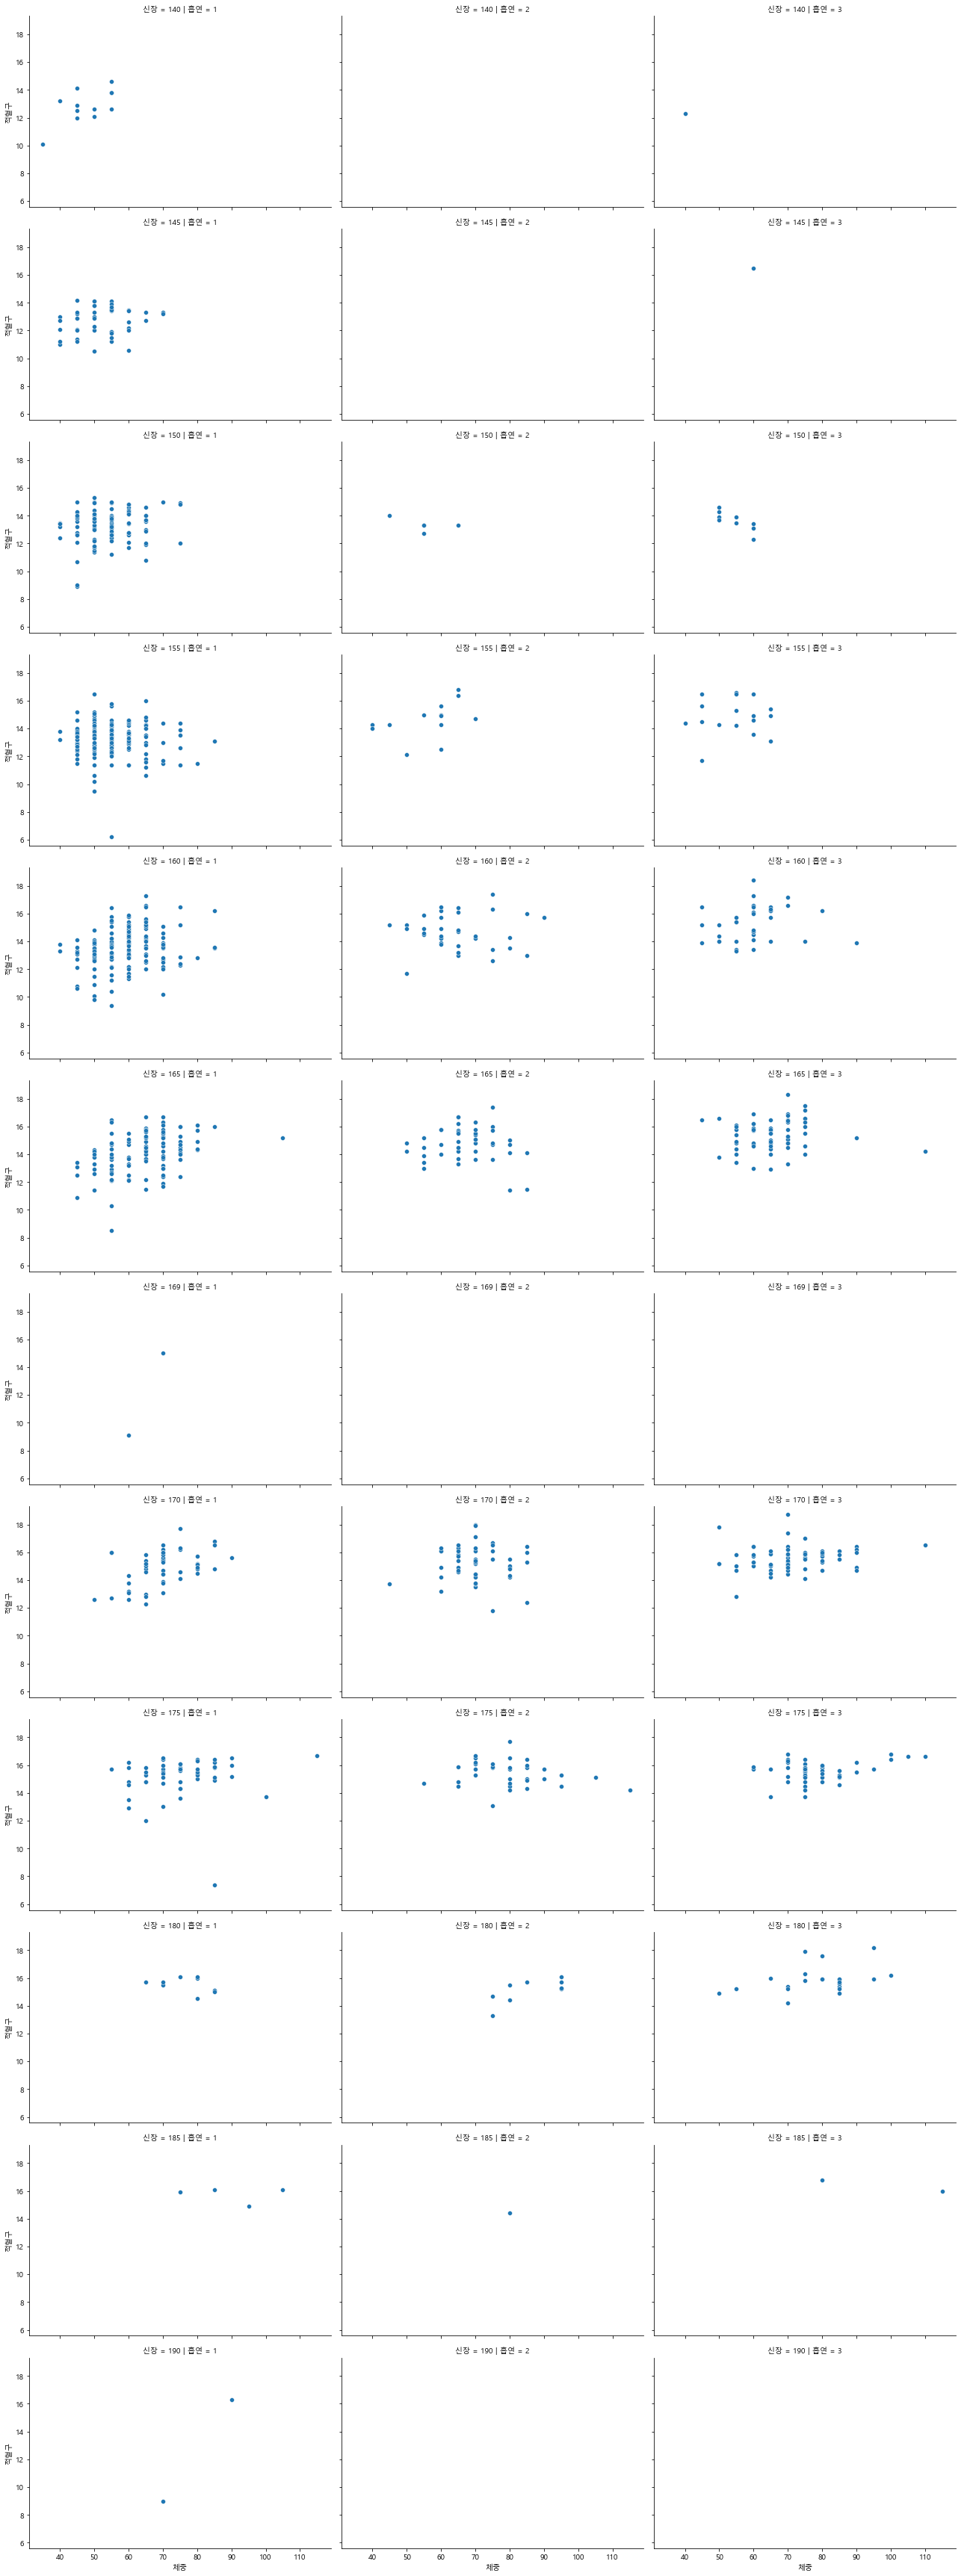

In [10]:
# FacetGrid - 산점도를 특정 컬럼을 기준으로 행, 열로 각각 분리 표현
grid = sns.FacetGrid(col='흡연', row='신장', data=df, height=4, aspect=1.5)
grid.map(sns.scatterplot, '체중', '적혈구')
grid.add_legend()

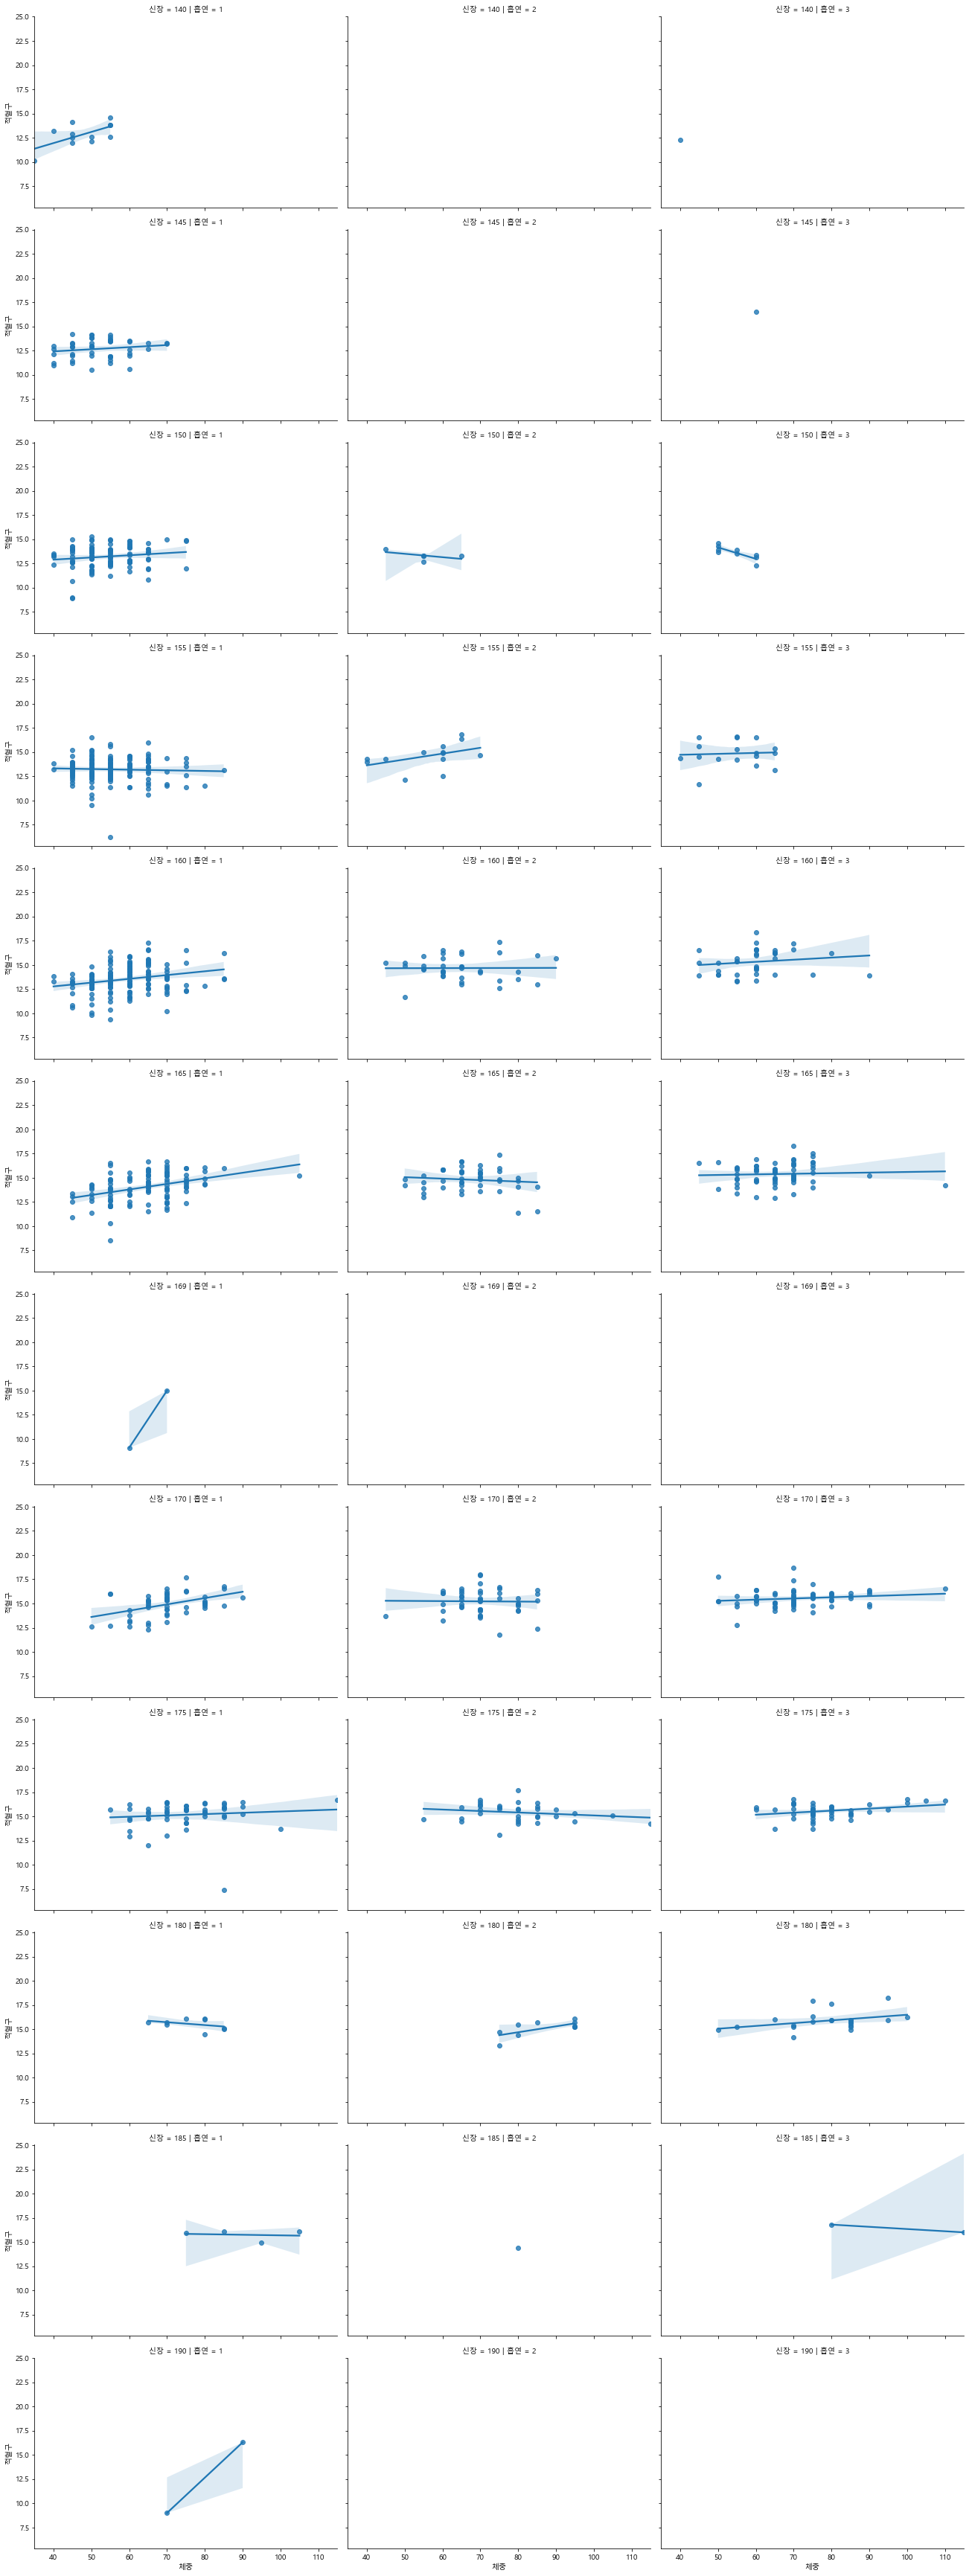

In [11]:
#lmplot - x축, y축, 행 분류 컬럼, 열 분류 컬럼을 지정하여 각각 플롯 출력
grid = sns.lmplot(x='체중', y='적혈구', row='신장', col='흡연', data=df, height=4, aspect=1.5)

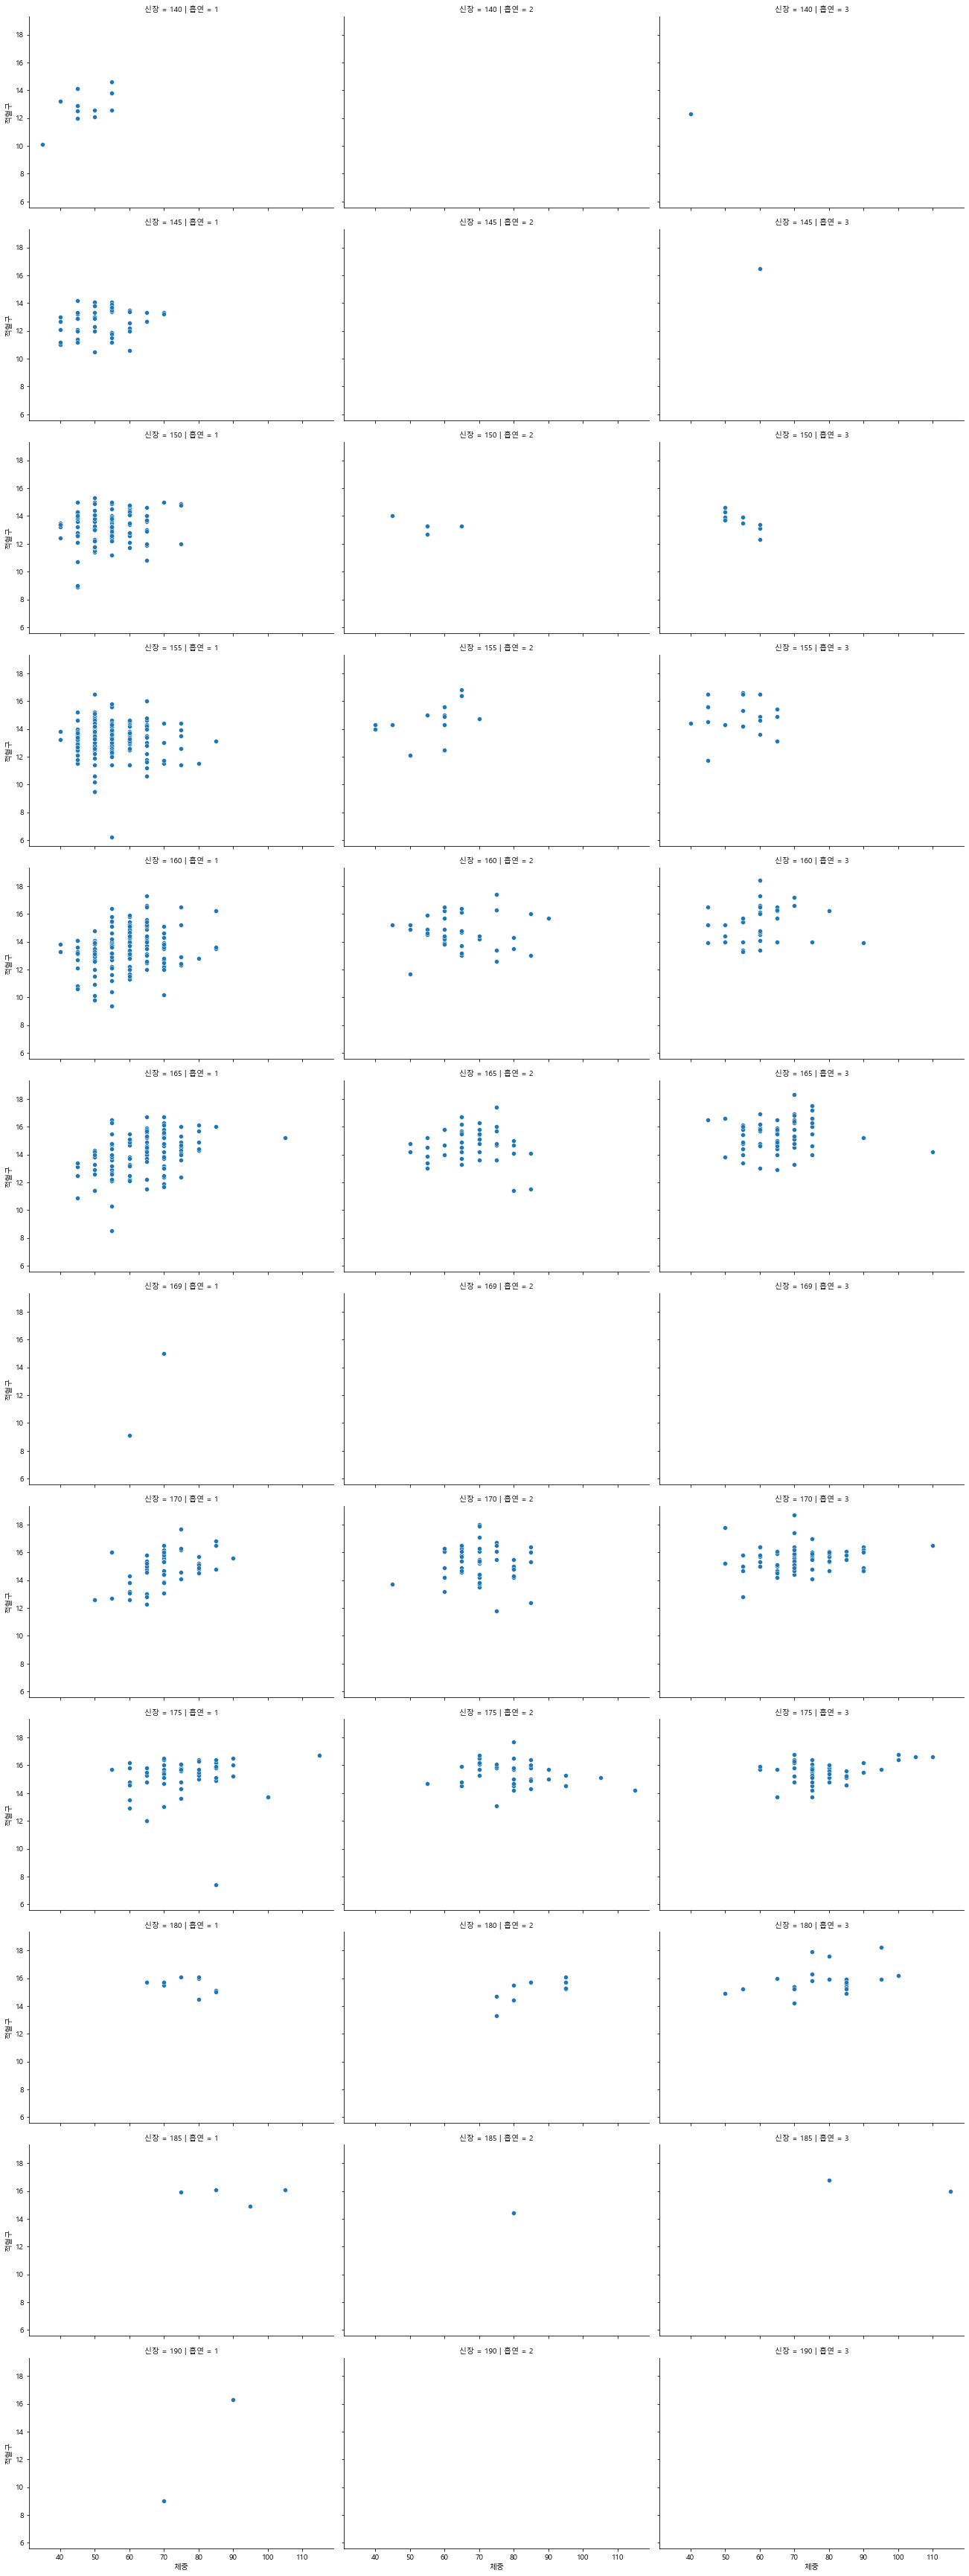

In [12]:
#relplot - x축, y축, 행 분류 컬럼, 열 분류 컬럼을 지정하여 각각 플롯 출력
grid = sns.relplot(x='체중', y='적혈구', row='신장', col='흡연', data=df, kind='scatter', height=4, aspect=1.5)